In [1]:
#read dataset
import os
import cv2
import numpy as np

In [2]:
for folder in os.listdir("DevanagariHandwrittenCharacterDataset/Train"):
    print(folder)

character_12_thaa
character_27_ra
character_13_daa
character_21_pa
character_14_dhaa
character_25_ma
character_30_motosaw
character_16_tabala
character_20_na
digit_8
digit_5
character_4_gha
character_32_patalosaw
character_18_da
character_9_jha
character_33_ha
digit_2
character_26_yaw
digit_7
digit_1
digit_4
character_31_petchiryakha
digit_9
character_3_ga
character_29_waw
character_6_cha
character_8_ja
character_23_ba
character_7_chha
character_28_la
character_22_pha
character_35_tra
digit_3
digit_6
character_34_chhya
character_24_bha
character_11_taamatar
digit_0
character_17_tha
character_10_yna
character_36_gya
character_19_dha
character_5_kna
character_2_kha
character_15_adna
character_1_ka


In [3]:
def load_images(path):
    labels=[]
    img_data=[]
    label_idx=[]
    i=-1
    for folder in os.listdir(path):
        labels.append(folder)
        i+=1
        for train_image in os.listdir(path + "/" +folder):
            image = cv2.imread(path + "/" +folder + "/" +train_image, cv2.IMREAD_GRAYSCALE)
            image=cv2.resize(image,(32,32))
            img_data.append(image)
            label_idx.append(i)
    return np.array(labels),np.array(img_data),np.array(label_idx)

In [4]:
label_name,X_train,y_train=load_images("DevanagariHandwrittenCharacterDataset/Train")
_,X_test,y_test=load_images("DevanagariHandwrittenCharacterDataset/Test")

In [5]:
print(len(y_train),len(y_test))
print(len(label_name))
#one hot encoding
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,46)
y_test = np_utils.to_categorical(y_test,46)

78200 13800
46


Using Theano backend.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [6]:
#one hot vectors
print(y_train[0:3,:])
print(y_test[0:3,:])
X_train = X_train.reshape(X_train.shape[0],32,32,1)
X_test = X_test.reshape(X_test.shape[0],32,32,1)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [7]:
#see a sample image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
sample=mpimg.imread("DevanagariHandwrittenCharacterDataset/Train/character_11_taamatar/214.png")

(32, 32)


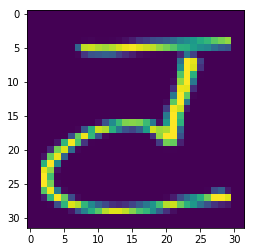

In [8]:
print(sample.shape)
plot=plt.imshow(sample)

In [9]:
#Train conv network now!
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, Dense, Dropout, Activation, Flatten
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization

In [10]:
model = Sequential()

#2 conv layers , 
model.add(Conv2D(32,(2,2),input_shape=(32,32,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(2,2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#to pass to dense we need to flatten
model.add(Flatten())

#2 dense layers for full connection
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.8))

model.add(Dense(46))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.fit(X_train,y_train,epochs=8,verbose=True,batch_size=32,validation_data=(X_test,y_test))
 

Train on 78200 samples, validate on 13800 samples
Epoch 1/8
78200/78200 [==============================] - 374s 5ms/step - loss: 2.3590 - acc: 0.3313 - val_loss: 0.8123 - val_acc: 0.8728
Epoch 2/8
78200/78200 [==============================] - 374s 5ms/step - loss: 1.6895 - acc: 0.4673 - val_loss: 0.5278 - val_acc: 0.9045
Epoch 3/8
78200/78200 [==============================] - 375s 5ms/step - loss: 1.5013 - acc: 0.5110 - val_loss: 0.3704 - val_acc: 0.9359
Epoch 4/8
78200/78200 [==============================] - 397s 5ms/step - loss: 1.4081 - acc: 0.5344 - val_loss: 0.3022 - val_acc: 0.9386
Epoch 5/8
78200/78200 [==============================] - 398s 5ms/step - loss: 1.3376 - acc: 0.5519 - val_loss: 0.2761 - val_acc: 0.9448
Epoch 6/8
78200/78200 [==============================] - 380s 5ms/step - loss: 1.2930 - acc: 0.5674 - val_loss: 0.2457 - val_acc: 0.9488
Epoch 7/8
78200/78200 [==============================] - 388s 5ms/step - loss: 1.2677 - acc: 0.5703 - val_loss: 0.2251 - val_acc

In [11]:
#scoring_on_test_set
score = model.evaluate(X_test,y_test)
print("Loss: ",score[0])
print("Accuracy: ",score[1]) 

#scoring_on_train_set
score = model.evaluate(X_train,y_train)
print("Loss: ",score[0])
print("Accuracy: ",score[1]) 

13800/13800 [==============================] - 17s 1ms/step
Loss:  0.21566840724236724
Accuracy:  0.9548550724637681
78200/78200 [==============================] - 96s 1ms/step
Loss:  0.19891996598276107
Accuracy:  0.9620716112470993


In [12]:
#save model
from keras.models import model_from_json 
model_json=model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print('saved')

saved
